In [2]:
from skyrim.libs.nwp import GFSModel, IFSModel

In [3]:
# specify the channels you are interested in
channels = [
    "u10m", # u-component (eastward, zonal) of wind at 10 meters
    "v10m", # v-component (northward, meridional) of wind at 10 meters
    "t2m", # temperature at 2m
]

In [4]:
gfs_model = GFSModel(channels=channels)
ifs_model = IFSModel(channels=channels)

2024-06-14 04:06:57.789 | INFO     | skyrim.libs.nwp.ifs:__init__:119 - IFS model initialized with channels: ['u10m', 'v10m', 't2m']
2024-06-14 04:06:57.791 | DEBUG    | skyrim.libs.nwp.ifs:__init__:120 - IFS cache location: /Users/m/.cache/skyrim/ifs


In [10]:
date = "20240613" # forecast start date
time = "1200" # forecast start time
lead_time = 36 # forecast lead time in hours

In [11]:
%%time
pred_ifs = ifs_model.predict(date, time, lead_time)
print(f"pred_ifs.shape: {pred_ifs.shape}")

2024-06-14 04:09:41.353 | DEBUG    | skyrim.libs.nwp.ifs:predict:235 - Forecast start time: 2024-06-13 12:00:00
2024-06-14 04:09:41.354 | DEBUG    | skyrim.libs.nwp.ifs:predict:236 - Forecast steps: [0, 3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33, 36]
2024-06-14 04:09:41.355 | DEBUG    | skyrim.libs.nwp.ifs:predict:237 - len(steps): 13
2024-06-14 04:09:41.362 | DEBUG    | skyrim.libs.nwp.ifs:available_start_time:190 - Checking for data at prefix: 20240613/12z/


<multiple>:   0%|          | 0.00/10.8M [00:00<?, ?B/s]

2024-06-14 04:09:50.788 | DEBUG    | skyrim.libs.nwp.ifs:_download_ifs_channel_grib_to_cache:369 - Request: datetime: 2024-06-13 12:00:00
2024-06-14 04:09:50.789 | DEBUG    | skyrim.libs.nwp.ifs:_download_ifs_channel_grib_to_cache:370 - Result: datetime: 2024-06-13 12:00:00
2024-06-14 04:09:50.789 | DEBUG    | skyrim.libs.nwp.ifs:fetch_ifs_dataarray:501 - Loaded u10m from /Users/m/.cache/skyrim/ifs/d94d89aecf9533cfc89111ae5b7d75c0e2d93377011c8849a553c1c1014c18cc


<multiple>:   0%|          | 0.00/10.8M [00:00<?, ?B/s]

2024-06-14 04:09:59.530 | DEBUG    | skyrim.libs.nwp.ifs:_download_ifs_channel_grib_to_cache:369 - Request: datetime: 2024-06-13 12:00:00
2024-06-14 04:09:59.531 | DEBUG    | skyrim.libs.nwp.ifs:_download_ifs_channel_grib_to_cache:370 - Result: datetime: 2024-06-13 12:00:00
2024-06-14 04:09:59.532 | DEBUG    | skyrim.libs.nwp.ifs:fetch_ifs_dataarray:501 - Loaded v10m from /Users/m/.cache/skyrim/ifs/8798dcb1349ccbd53dabe48144a9568eaa72e7d242ca983dfcedb95e61e74369


<multiple>:   0%|          | 0.00/8.19M [00:00<?, ?B/s]

2024-06-14 04:10:07.246 | DEBUG    | skyrim.libs.nwp.ifs:_download_ifs_channel_grib_to_cache:369 - Request: datetime: 2024-06-13 12:00:00
2024-06-14 04:10:07.247 | DEBUG    | skyrim.libs.nwp.ifs:_download_ifs_channel_grib_to_cache:370 - Result: datetime: 2024-06-13 12:00:00
2024-06-14 04:10:07.248 | DEBUG    | skyrim.libs.nwp.ifs:fetch_ifs_dataarray:501 - Loaded t2m from /Users/m/.cache/skyrim/ifs/70818f319bebf07aab6125f17a58d2854d229a786a905bc9610a5a5ddf429fb6

pred_ifs.shape: (13, 3, 721, 1440)
CPU times: user 2.44 s, sys: 446 ms, total: 2.89 s
Wall time: 26.5 s


In [12]:
%%time
pred_gfs = gfs_model.predict(date, time, lead_time)
print(f"pred_gfs.shape: {pred_gfs.shape}")

2024-06-14 04:10:35.372 | DEBUG    | skyrim.libs.nwp.gfs:predict:287 - Forecast start time: 2024-06-13 12:00:00
2024-06-14 04:10:35.373 | DEBUG    | skyrim.libs.nwp.gfs:predict:288 - Forecast steps: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36]
2024-06-14 04:10:35.374 | DEBUG    | skyrim.libs.nwp.gfs:predict:289 - len(steps): 37
2024-06-14 04:10:35.377 | DEBUG    | skyrim.libs.nwp.gfs:fetch_gfs_dataarray:410 - Creating GFS dataarray with shape: (37, 3, 721, 1440)
Fetching GFS for 2024-06-13 12:00:00:   0%|          | 0/3 [00:00<?, ?it/s]2024-06-14 04:10:35.378 | DEBUG    | skyrim.libs.nwp.gfs:_download_s3_index_to_cache:522 - Index File /Users/m/.cache/skyrim/gfs/00f219686a870cea9ff6cb07174bc11b1a1ae5e63b0aedfdbba3fa7778f6151a already exists in cache, skipping download.
2024-06-14 04:10:35.380 | DEBUG    | skyrim.libs.nwp.gfs:fetch_gfs_dataarray:427 - Fetching GFS grib file for channel: u10m at

pred_gfs.shape: (37, 3, 721, 1440)
CPU times: user 20.6 s, sys: 3.18 s, total: 23.8 s
Wall time: 3min 7s


In [13]:
# interested in winds speed at akayaka, Turkey (great place for kite surfing!)
akyaka_coords = {"lat": 37.0557, "lon": 28.3242}

pred_akyaka_ifs = pred_ifs.sel(lat=akyaka_coords["lat"], lon=akyaka_coords["lon"], method="nearest")
pred_wind_speed_ifs = (pred_akyaka_ifs.sel(channel="u10m")**2 + pred_akyaka_ifs.sel(channel="v10m")**2)**0.5

pred_akyaka_gfs = pred_gfs.sel(lat=akyaka_coords["lat"], lon=akyaka_coords["lon"], method="nearest")
pred_wind_speed_gfs = (pred_akyaka_gfs.sel(channel="u10m")**2 + pred_akyaka_gfs.sel(channel="v10m")**2)**0.5


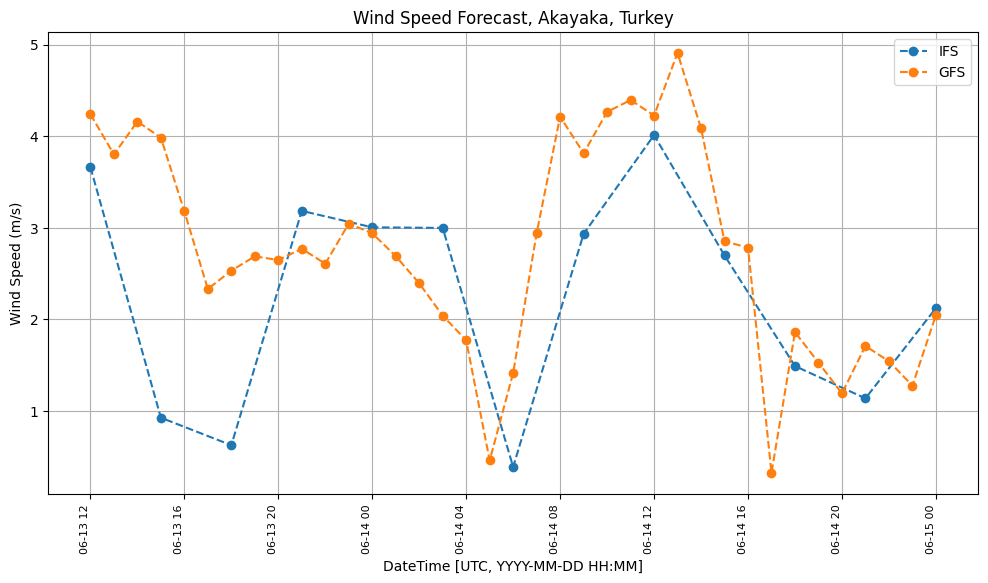

In [22]:
plt.figure(figsize=(12, 6))
plt.plot(pd.to_datetime(pred_ifs.time.values), pred_wind_speed_ifs.values, "--o", label="IFS", )
plt.plot(pd.to_datetime(pred_gfs.time.values), pred_wind_speed_gfs.values, "--o", label="GFS", )
plt.title("Wind Speed Forecast, Akayaka, Turkey")
plt.xlabel("DateTime [UTC, YYYY-MM-DD HH:MM]")
plt.ylabel("Wind Speed (m/s)")
# show all the time ticks
plt.xticks(rotation=90, ha='right', fontsize=8)
plt.grid()
plt.legend()
plt.show()